# Conjunto de datos: Encontrando un dataset.

A la hora de definir el dataset a investigar y trabajar, optamos por utilizar “AI Impact on Job Market”, disponible en la plataforma Kaggle. Este conjunto de datos explora cómo la evolución de la inteligencia artificial está transformando el mercado laboral. En particular, proporciona información relevante sobre qué empleos se están viendo afectados por el uso de la IA y cuáles son los factores que pueden estar influyendo en este impacto:

**Variables categóricas**

*Nominales:*

- Job title
- Industry
- Job status
- Location

*Ordinales:*

- AI impact level
- Required education.

**Variables numéricas:**

*Continuas:*

- Median salary
- Remote work ratio
- Automation risk

*Discretas:*

- Experience required
- Job openings (2024)
- Projected openings (2030)



Elegimos el dataset “AI Impact on Job Market” porque aborda un tema actual y de gran relevancia: cómo la inteligencia artificial está transformando el empleo. Su análisis permite identificar tendencias, riesgos de automatización y proyecciones laborales, lo que aporta información útil para la toma de decisiones en educación y mercado laboral.

In [1]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

ruta = "dataset/ai_job_trends_dataset.csv"

df = pd.read_csv(ruta)

print("A continuación se muestran las primeras 5 filas del dataset:")
df.head()


A continuación se muestran las primeras 5 filas del dataset:


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [ ]:
print("A continuación se muestra el resúmen técnico de la tabla")
print("\n")
df.info()
print("\n")
print("A continuación se muestra el número de filas y columnas del dataset")
print("\n")
df.shape

A continuación se muestra el resúmen técnico de la tabla


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversit

(30000, 13)

# Limpieza de datos:

Para hacer una limpieza de los datos hay que hacer las siguientes cosas:

1. Corrección de duplicados y manejo de datos faltantes.
2. Corrección de tipos de datos y diferencias de semántica de mismos datos (Ej: "dentista" y "Dentista")
3. Posibles errores de incoherencia (Numéricas y categóricas)



In [2]:
# Paso 1: Manejo de duplicados, ya que de esta manera disminuímos el tamaño del dataset desde el inicio, facilitando la limpieza más adelante.

# Cuantas filas duplicadas existen:

print(f"Filas duplicadas encontradas: {df.duplicated().sum()}")

# Eliminar las filas duplicadas:

if (df.duplicated().sum() == 0):
  print("\n")
  print("No hay filas duplicadas que eliminar")
  print("\n")
else:
  df.drop_duplicates(inplace=True)
  print(f"Filas duplicadas encontradas: {df.duplicated().sum()}")
  print("\n")


# Paso 2: Corrección de tipos de datos

#Acá queremos observar que tipo de datos tenemos en cada columna y si son coherentes a
#la información que entregan. Por ejemplo, verificar que datos numéricos no sean objetos
#(Por ejemplo Salario medio: $50,000)


Filas duplicadas encontradas: 0


No hay filas duplicadas que eliminar




In [ ]:
# Paso 3: Tratamiento de incoherencias


#En este caso observamos una incoherencia relacionada con la cantidad de ofertas de trabajo
#y el estado del trabajo. Observamos que en algúnos casos ocurría que según "Job status" la
#cantidad de trabajos disminuía y según "Job Openings (2024)" y "projected openings (20309)" aumentó y viceversa.


df = df[~((df["Job Status"] == "Increasing") & (df["Job Openings (2024)"] > df["Projected Openings (2030)"]))]
df = df[~((df["Job Status"] == "Decreasing") & (df["Job Openings (2024)"] < df["Projected Openings (2030)"]))]
df.info()
print("\n")
# Al ejecutar el siguiente codigo:


industry_jobs = df.groupby('Industry')['Job Title'].unique()
for industry, jobs in industry_jobs.items():
    print(f"--- Industria: {industry} ---")
    print(jobs)
    print("\n")


#Se puede observar que el campo "Industry" no es nada confiable, ya que categoriza mal los trabajos.
#Tenemos, por ejemplo, que "fashion designer" está en la industria del transporte, por lo que
#optamos a desarrollar una nueva columna basandonos en palabras clave que se encuentren en el campo
#"Job Title". En base a esto clasificar los trabajos con ese nuevo parametro y así obtener información
#relevante respecto a las diferentes industrias.




<class 'pandas.core.frame.DataFrame'>
Index: 15078 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    15078 non-null  object 
 1   Industry                     15078 non-null  object 
 2   Job Status                   15078 non-null  object 
 3   AI Impact Level              15078 non-null  object 
 4   Median Salary (USD)          15078 non-null  float64
 5   Required Education           15078 non-null  object 
 6   Experience Required (Years)  15078 non-null  int64  
 7   Job Openings (2024)          15078 non-null  int64  
 8   Projected Openings (2030)    15078 non-null  int64  
 9   Remote Work Ratio (%)        15078 non-null  float64
 10  Automation Risk (%)          15078 non-null  float64
 11  Location                     15078 non-null  object 
 12  Gender Diversity (%)         15078 non-null  float64
dtypes: float64(4), int64(

In [ ]:

#A continuación el desarrollo de la creación de la nueva columna basandose en palabras
#clave de los trabajos.

#Escencialmente la idea es ignorar la columna industria y generar una de industry_cleaned basada
#en las palabras clave de los trabajos.


# A continuación la cantidad de industrias definidas junto a la cantidad de trabajos en ella.
print(df['Industry'].value_counts())


# A continuación el nuevo diccionario de palabras claves con el cual se categorizarán mejor los trabajos.

industry_keywords = {
    'Healthcare & Life Sciences': [
        'nurse', 'doctor', 'surgeon', 'therapist', 'medical', 'pharmacist', 'dentist',
        'psychiatrist', 'psychologist', 'clinical', 'biomedical', 'scientist',
        'practitioner', 'health', 'paramedic', 'midwife', 'optician', 'physiotherapist',
        'chiropractor', 'veterinary', 'herbalist', 'acupuncturist', 'pathologist',
        'neurosurgeon', 'oncologist', 'dietitian', 'researcher', 'therapeutic',
        'microbiologist', 'chiropodist', 'optometrist', 'osteopath', 'ambulance',
        'radiographer', 'orthoptist', 'geneticist', 'immunologist', 'haematologist',
        'homeopath', 'cytogeneticist', 'ophthalmologist', 'pharmacologist', 'podiatrist',
        'physiologist', 'toxicologist', 'ergonomist'
    ],

    'Environment, Agriculture & Earth Sciences': [
        'horticulturist', 'ecologist', 'ranger', 'warden', 'meteorologist',
        'geophysicist', 'seismic', 'geochemist', 'astronomer', 'herpetologist',
        'oceanographer', 'hydrologist', 'arboriculturist', 'mudlogger',
        'cartographer', 'environmental', 'field'
    ],

    'Social & Community Services': [
        'counsellor', 'youth worker', 'aid worker', 'volunteer', 'advice worker',
        'guidance', 'community'
    ],

    'Education & Research': [
        'teacher', 'professor', 'lecturer', 'educational', 'academic', 'tutor',
        'adviser', 'librarian', 'archivist', 'historian', 'lexicographer', 'mentor',
        'interpreter', 'translator', 'chemist', 'archaeologist'
    ],

    'IT, Technology & Data': [
        'software', 'data', 'it', 'web', 'systems', 'network', 'programmer', 'developer',
        'database', 'technical', 'analyst', 'computer', 'cybersecurity', 'digital',
        'hardware', 'technologist'
    ],

    'Engineering & Manufacturing': [
        'engineer', 'manufacturing', 'production', 'plant', 'industrial', 'mechanical',
        'civil', 'electrical', 'chemical', 'materials', 'operator', 'technician',
        'automotive', 'aeronautical', 'structural', 'geologist', 'surveyor', 'architect', 'metallurgist'
    ],

    'Creative, Arts & Media': [
        'designer', 'artist', 'writer', 'editor', 'producer', 'journalist', 'media',
        'actor', 'animator', 'photographer', 'musician', 'director', 'illustrator',
        'presenter', 'curator', 'graphic', 'fashion', 'copywriter', 'broadcasting',
        'press', 'radio', 'publishing', 'dancer', 'printmaker'
    ],

    'Legal & Public Service': [
        'lawyer', 'solicitor', 'barrister', 'legal', 'officer', 'government', 'civil service',
        'inspector', 'police', 'firefighter', 'social worker', 'diplomatic', 'attorney',
        'patent', 'adjuster', 'lobbyist', 'claims', 'conveyancer'
    ],

    'Finance, Business & Consulting': [
        'accountant', 'banker', 'financial', 'investment', 'trader', 'actuary', 'manager',
        'executive', 'consultant', 'clerk', 'auditor', 'controller',
        'treasurer', 'broker', 'economist', 'planner', 'advisor', 'human resources',
        'secretary', 'administrator', 'assistant', 'comptroller', 'statistician'
    ],

    'Retail, Sales & Customer Service': [
        'retail', 'sales', 'buyer', 'merchandiser', 'customer service', 'representative',
        'cashier', 'store manager', 'account executive', 'estate agent', 'bookseller'
    ],

    'Transportation & Logistics': [
        'transport', 'logistics', 'driver', 'pilot', 'shipping', 'distribution',
        'supply chain', 'warehouse', 'freight', 'cabin crew', 'airline'
    ],

    'Hospitality, Tourism & Entertainment': [
        'hotel', 'restaurant', 'catering', 'chef', 'barista', 'tour', 'travel',
        'leisure', 'sports', 'coach', 'fitness', 'event organiser', 'gallery', 'museum'
    ]
}


# En base a estas nuevas industrias, debemos implementar una función que recorra la tabla, identifique a que industria corresponde el trabajo, y categorizarlo como corresponda. De no estar en ningúna, se le asignara "other" en industria.


def classify_industry(job_title):
  job_title_lc = str(job_title).lower()
  for industry, keywords in industry_keywords.items():
      if any(keyword in job_title_lc for keyword in keywords):
        return industry
  return "Other"

print("\n")

df['Updated_industry'] = df['Job Title'].apply(classify_industry)

print(df['Updated_industry'].value_counts())

print("\n")

updated_industry_jobs = df.groupby('Updated_industry')['Job Title'].unique()

# Imprime la lista para revisarla
for industry, jobs in updated_industry_jobs.items():
    print(f"--- Industria: {industry} ---")
    print(jobs)
    print("\n") # Agrega un espacio para legibilidad


Industry
Manufacturing     1974
Entertainment     1958
Healthcare        1880
Education         1874
Finance           1855
IT                1852
Retail            1843
Transportation    1842
Name: count, dtype: int64


Updated_industry
Healthcare & Life Sciences                   3460
Engineering & Manufacturing                  2250
Finance, Business & Consulting               2180
IT, Technology & Data                        1993
Legal & Public Service                       1558
Creative, Arts & Media                       1260
Education & Research                          863
Environment, Agriculture & Earth Sciences     587
Other                                         270
Social & Community Services                   252
Retail, Sales & Customer Service              191
Transportation & Logistics                    110
Hospitality, Tourism & Entertainment          104
Name: count, dtype: int64


--- Industria: Creative, Arts & Media ---
['Journalist, newspaper' 'Ceramics designe

--------------------------------------------------------------------------------------------------
# Ya con esto finalizamos la limpieza de datos. A continuación nos enfocaremos en que cosas podemos descubrir de los datos

--------------------------------------------------------------------------------------------------


In [ ]:
#Con la siguiente función, podremos obtener un resúmen de las variables numéricas.

print("\n")
print(df.describe())
print("-"*100)
print("Cantidad de trabajos por industria (actualizada)")
print("-"*100)
print(df['Updated_industry'].value_counts())
print("\n")
print("-"*100)
print("Porcentaje de trabajos por industria (actualizada)")
print("-"*100)
print(df['Updated_industry'].value_counts(normalize=True)*100)
print("-"*100)
print("Cantidad de trabajos por nivel de impacto")
print("-"*100)
print(df['AI Impact Level'].value_counts())
print("\n")
print("-"*100)
print("Porcentaje de trabajos por nivel de impacto")
print("-"*100)
print(df['AI Impact Level'].value_counts(normalize=True)*100)



       Median Salary (USD)  Experience Required (Years)  Job Openings (2024)  \
count         15078.000000                 15078.000000         15078.000000   
mean          90468.544794                    10.059889          5030.013463   
std           34386.074779                     6.042019          2864.234106   
min           30003.410000                     0.000000           100.000000   
25%           61109.677500                     5.000000          2553.000000   
50%           90504.570000                    10.000000          5001.000000   
75%          119738.987500                    15.000000          7532.000000   
max          149990.730000                    20.000000         10000.000000   

       Projected Openings (2030)  Remote Work Ratio (%)  Automation Risk (%)  \
count               15078.000000           15078.000000         15078.000000   
mean                 5084.319737              49.781245            50.047837   
std                  2864.678145     

# Analisis profundo de las 4 variables más relevantes:

***Para las numéricas (df.describe())***

Las 2 columnas más relevantes a nuestro juicio son "Median Salary" y "Automation Risk" de las variables numéricas.

**Para Median Salary":**

- *Tendencia central:* La media (\$90,468) y la mediana (\$90,504) son muy cercanas, lo que puede indicar una distribución simétrica. Esto sugiere que la muestra representa un mercado laboral con una estructura salarial muy equilibrada.

- *Dispersión y rango:* Los salarios se distribuyen en un rango que va desde los \$30.000 aproximadamente, hasta los \$150.000 aproximadamente, con una desviación estandar de \$35.0000 aproximadamente, lo que indica una gran diversidad de salarios.

Respecto a la distribución de, podemos utilizar cuartiles para sacar información relevante. El primer cuartíl (\$61,109) indica que el 25% de los trabajos ganan menos que eso. El segundo cuartil (O mediana) indica que el 50% de los trabajos ganan por debajo \$90.504. El tercer cuartil nos indica que el 75% de los trabajos, ganan menos que \$119.738 y el 25% gana sobre ese valor. En base a esto, podemos utilizar el rango intercuartílico (Entre Q1 y Q3) para obtener información relevante. Con esta información, podemos decir que la clase "media" salarial, se encuentra entre aproximadamente \$61.000 y \$120.000.


***Para Automation Risk:***

- "Tendencia central:" La media (50.05%) y la mediana (49.7%) son muy cercanas, lo que nos indica una distribución muy simétrica. Esto indica que el dataset está equilibrado, por ende hay una cnatidad similar de trabajos con bajo riesgo y con alto riesgo.

- "Dispersión y rango:" Aquí, la desviación estándar (28.77) indica que hay una gran variabilidad en el riesgo de automatización, ya que tenemos trabajos muy por debajo del promedio, y trabajos muy por encima del promedio.

Respecto a la distribución, el primer cuartil (25.19%) indica que el 25% de los trabajos tiene un riesgo de automatización inferior a ese valor. El segundo cuartil (49.71%) divide el dataset por la mitad. El tercer cuartil (74.87%) nos muestra que el 75% de los trabajos tienen un riesgo inferior a esta cifra, y que el 25% más vulnerable se encuentra por sobre este valor.

Con esta infomación, podemos anailzar el rango intercuartilico, que se encuentra entre 25% y 75% aproximadamente (Alrededor de 50%), lo que refuerza la idea de que hay una dispersión muy "heterogénea" sobre los riesgos.


***Para Updated_industry:***

El analisis de frecuencias en Updated_industry muestra una concentración en las industrias de "Healthcare & Life Sciences", "Engineering & Manufacturing" y "Finance, Buisness & Consoulting". Estos 3 conjuntos conforman más del 50% de los datos. Esto indica que muy posiblemente, las conclusiones del estudio se encuentren influenciadas por estos grupos a diferencia de otras areas con una menor representación.

***Para Ai Impact Level:***

La variable presenta una distribución muy equilibrada, ya que los 3 niveles tienen una representación muy similar en la muestra. Esta similitud nos permite comparar otras métricas entre los grupos sin que haya una gran diferencia en tamaño que pueda estar influenciando los resultados.

# Analisis Breve de las variables no relevantes:

- **Experience Required:** Los datos cubren desde 0 a 20 años de experiencia, con una mediana de 10 años, conformando una distribución bastante simétrica. No muy relevante para el tipo de investigación que queremos hacer.

- **Job Openings y Projected Openings:** No lo utilizaremos, ya que el objetivo principal de nuestra investigación se centra en el impacto de la IA en el salario de un trabajo. (Más adelante entraremos en profundidad a este tema)

- **Remote Work Ratio:** Con una media y mediana cercana al 50% y una alta desviación estandar (Aproximadamente 29%) indica una gran diversidad entre trabajos remotos y presenciales.

- **Gender diversity:** Con una media y mediana cercana al 50% sugiere que dentro del dataset hay una división por género equilibrada.

- **Job Status:** La cantidad de trabajos en crecimiento y en decrecimiento se encuentran muy cercanas, indicando un equilibrio en el mercado laboral.

- **Required education:** El nivel educativo más común es "Bachelor's degree".

- **Location:** La mayoría de los datos provienen de EEUU, lo que indica que las conclusiones deben ser contextualizadas a ese mercado laboral.

- **Industry:** No la tomamos en consideración por estar completamente incoherente. Por eso hicimos una nueva columna actualizada de las industrias.


Para encontrar datos atípicos, o outliers haremos uso de gráficas de caja en las variables numéricas que nos interesan.


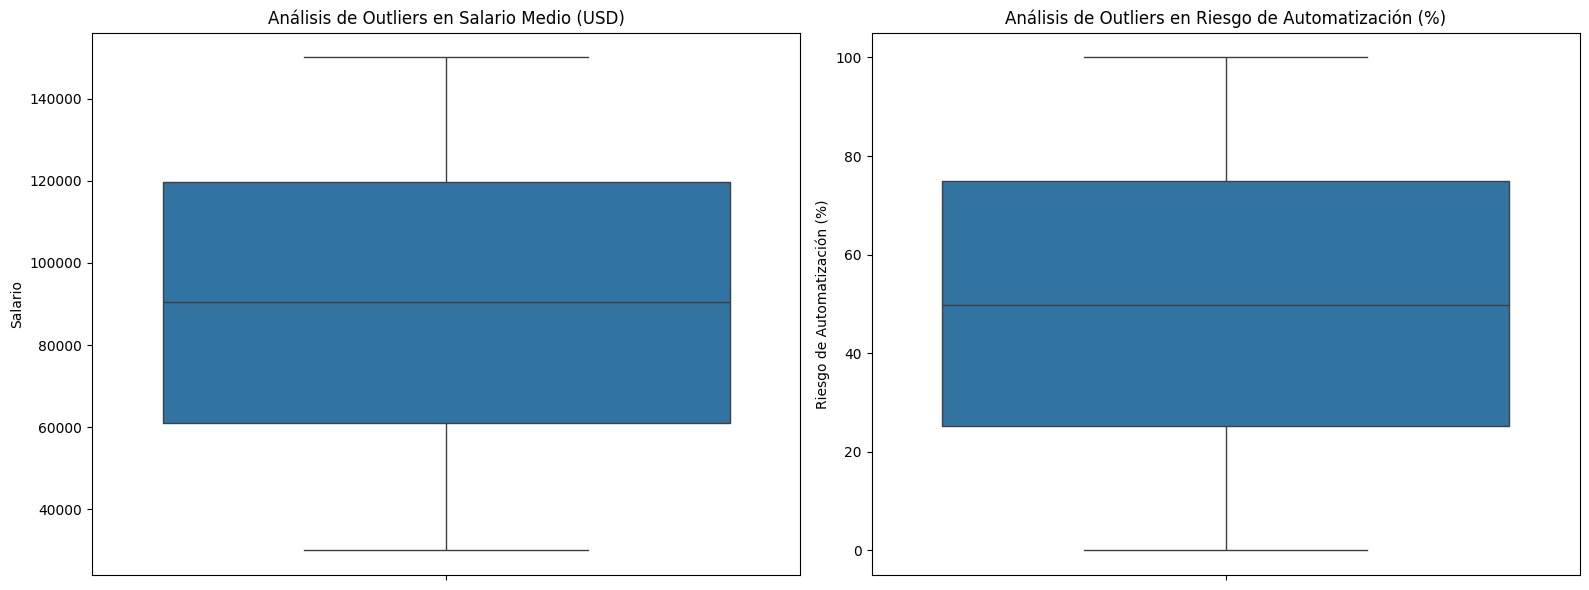

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y=df['Median Salary (USD)'])
plt.title('Análisis de Outliers en Salario Medio (USD)')
plt.ylabel('Salario')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Automation Risk (%)'])
plt.title('Análisis de Outliers en Riesgo de Automatización (%)')
plt.ylabel('Riesgo de Automatización (%)')

plt.tight_layout()
plt.show()

***Gracias a los gráficos hechos, podemos decir que no hay datos anormales, también conocidos como outliers. Como se puede observar en la figuras anteriores, no se detectaron puntos fuera de los límites definidos por los bigotes del diagrama.***


/tmp/ipython-input-2933769741.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_count, x='Industria', y='Cantidad', palette='viridis')


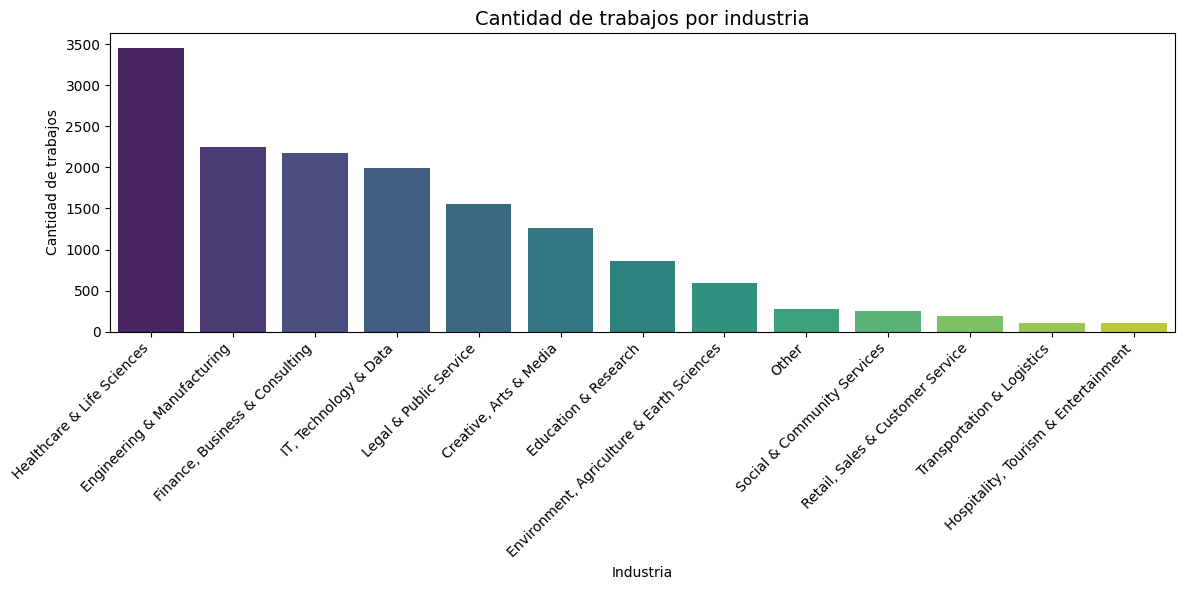

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

industry_count = df['Updated_industry'].value_counts().reset_index()
industry_count.columns = ['Industria', 'Cantidad']

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_count, x='Industria', y='Cantidad', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de trabajos por industria", fontsize=14)
plt.xlabel("Industria")
plt.ylabel("Cantidad de trabajos")
plt.tight_layout()
plt.show()

Podemos apreciar una mayoria de datos en nuestra base de datos forman parte de la industria de la salud, con el segundo lugar muy igualado entre las industrias de la ingieneria, finanzas, e informatica.

/tmp/ipython-input-3668028858.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impact_by_industry, x='Updated_industry', y='change', palette='coolwarm')


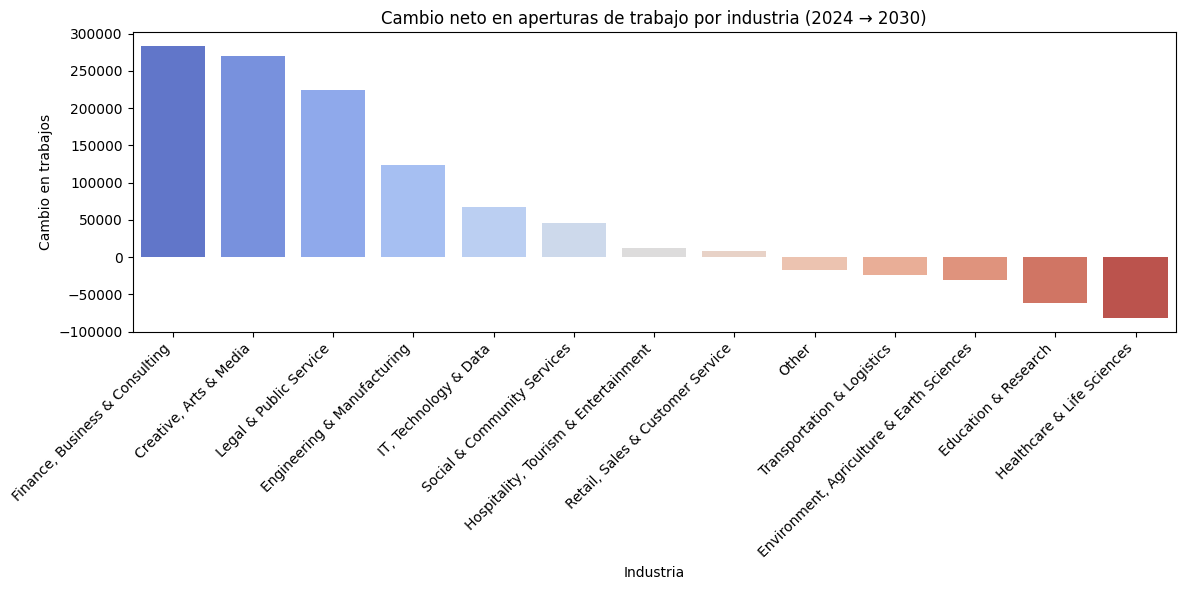

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['change'] = df['Projected Openings (2030)'] - df['Job Openings (2024)']

impact_by_industry = df.groupby('Updated_industry')['change'].sum().reset_index()
impact_by_industry = impact_by_industry.sort_values('change', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=impact_by_industry, x='Updated_industry', y='change', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Cambio neto en aperturas de trabajo por industria (2024 → 2030)")
plt.xlabel("Industria")
plt.ylabel("Cambio en trabajos")
plt.tight_layout()
plt.show()

Podemos apreciar que la IA tiene un impacto altamente positivo en las industrias de finanzas, artes, y servicios legales.
Las industrias que se ven más perjudicadas son las de educación y salud.

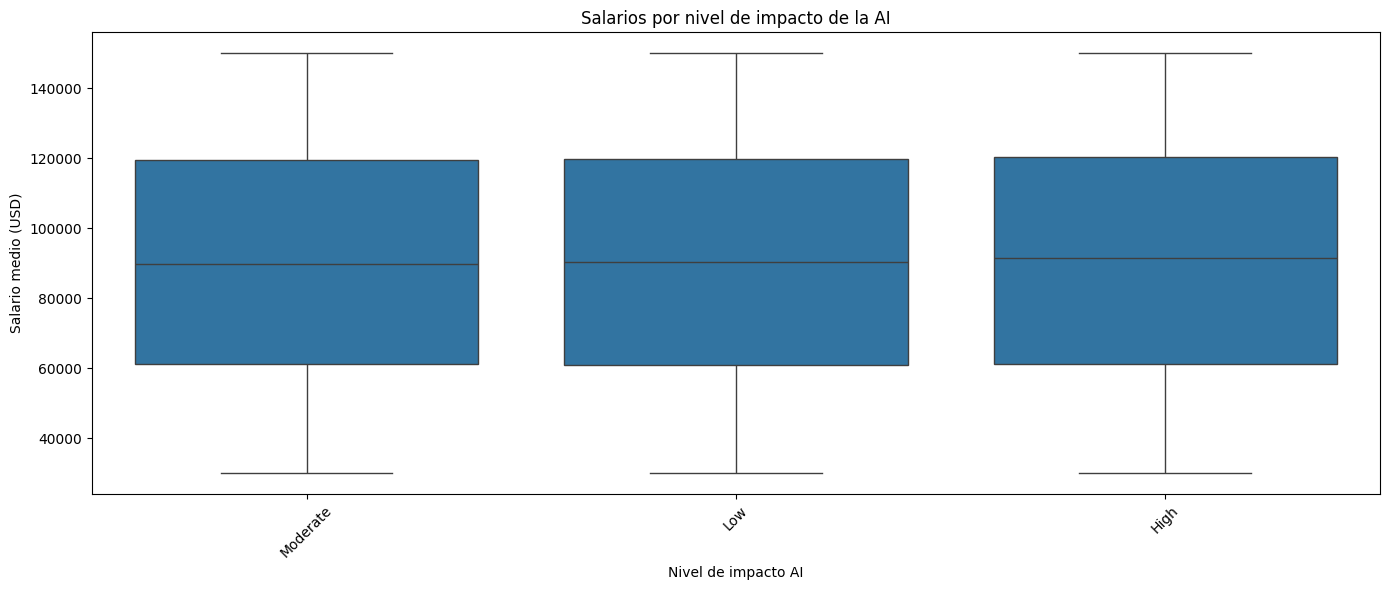

In [ ]:
# --- 1. Salarios por nivel de impacto AI ---
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='AI Impact Level', y='Median Salary (USD)')
plt.xticks(rotation=45)
plt.title("Salarios por nivel de impacto de la AI")
plt.xlabel("Nivel de impacto AI")
plt.ylabel("Salario medio (USD)")
plt.tight_layout()
plt.show()

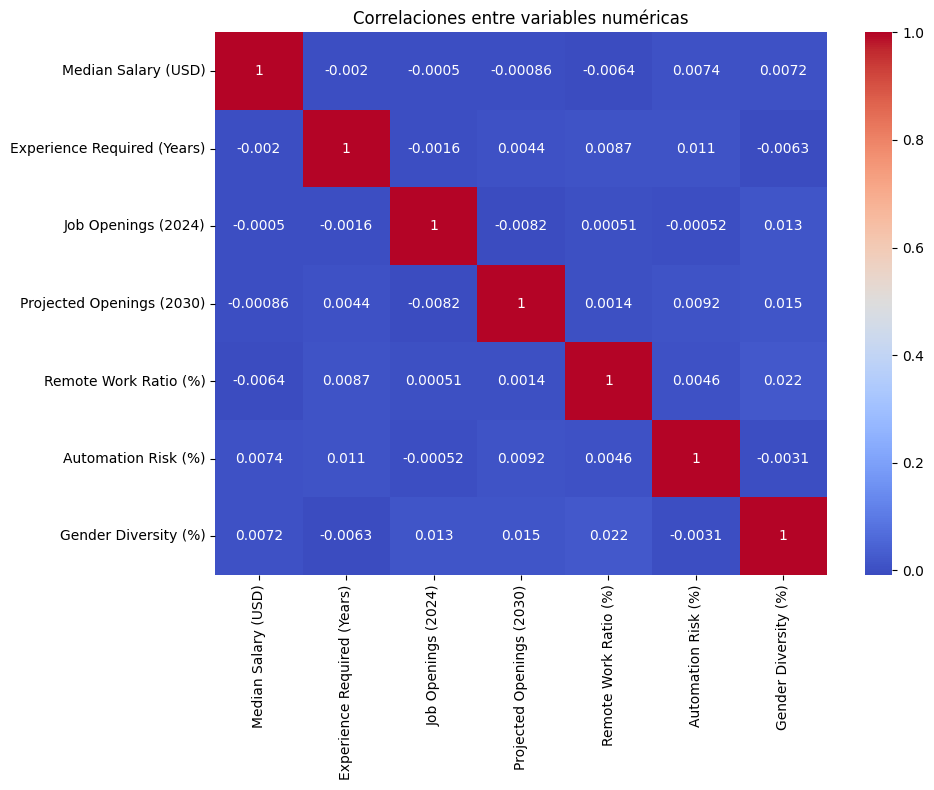

In [ ]:
# --- 2. Mapa de calor de correlaciones ---
df_sin_cambio = df.drop(columns=['change'])

plt.figure(figsize=(10,8))
sns.heatmap(df_sin_cambio.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlaciones entre variables numéricas")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3778652952.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Automation Risk (%)', y='Updated_industry', palette='viridis', ci=None)
/tmp/ipython-input-3778652952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Automation Risk (%)', y='Updated_industry', palette='viridis', ci=None)


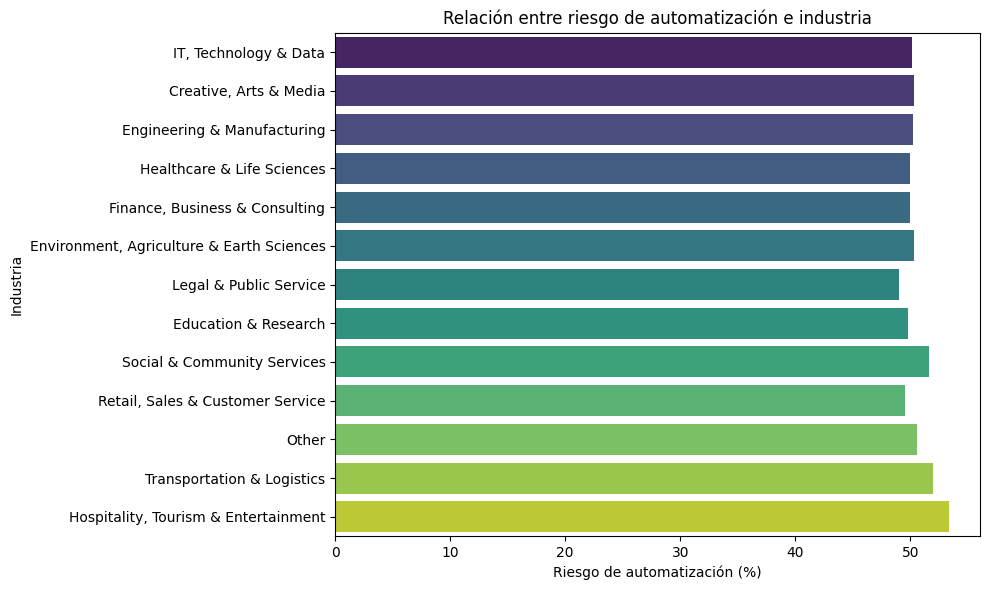

In [ ]:
# --- . Relación riesgo de automatización vs industria ---
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Automation Risk (%)', y='Updated_industry', palette='viridis', ci=None)
plt.title("Relación entre riesgo de automatización e industria")
plt.ylabel("Industria")
plt.xlabel("Riesgo de automatización (%)")
plt.tight_layout()
plt.show()

# Las barras negras al final indican un rango de variablidad, que representa que tan disperso son los datos.

/tmp/ipython-input-685739874.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Automation Risk (%)', y='Updated_industry',hue = "AI Impact Level", palette='viridis', ci=None)


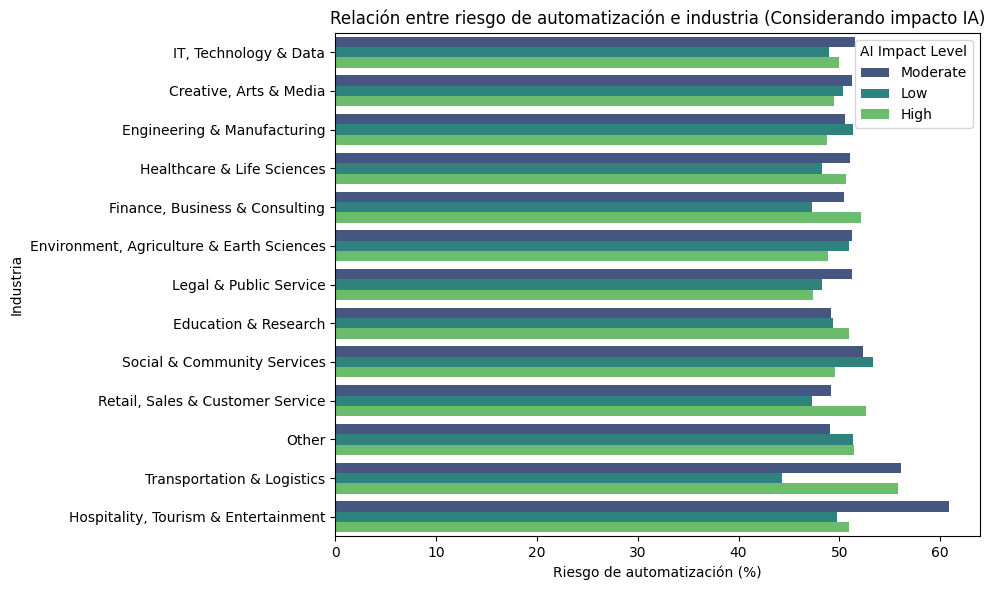

In [ ]:
# --- 4. Relación riesgo de automatización vs industria (Considerando impacto IA)---
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Automation Risk (%)', y='Updated_industry',hue = "AI Impact Level", palette='viridis', ci=None)
plt.title("Relación entre riesgo de automatización e industria (Considerando impacto IA)")
plt.ylabel("Industria")
plt.xlabel("Riesgo de automatización (%)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3809052848.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Automation Risk (%)', y='Median Salary (USD)', palette='viridis')


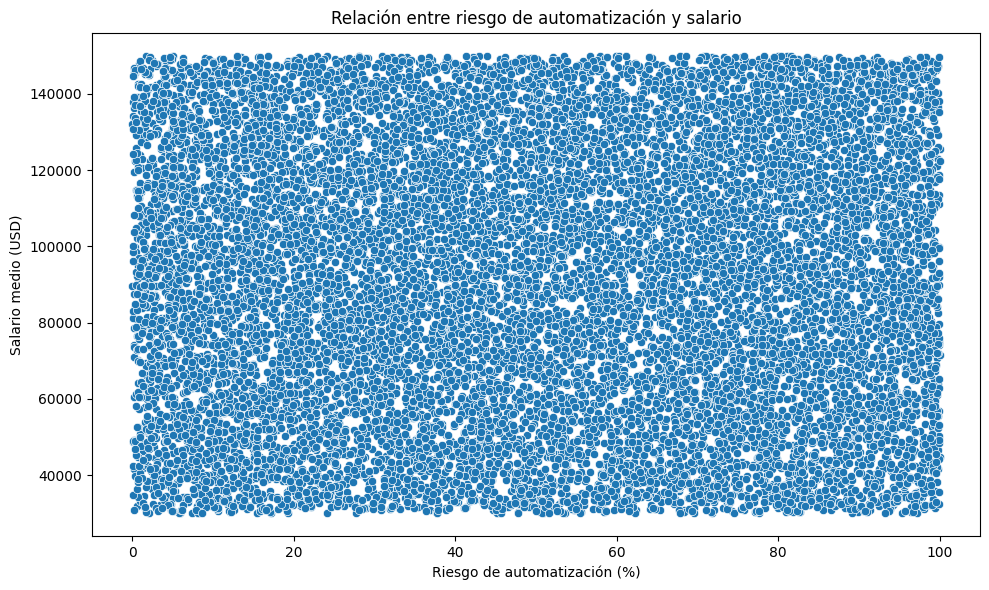

In [ ]:
# --- 5 Relación riesgo de automatización vs salario ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Automation Risk (%)', y='Median Salary (USD)', palette='viridis')
plt.title("Relación entre riesgo de automatización y salario")
plt.xlabel("Riesgo de automatización (%)")
plt.ylabel("Salario medio (USD)")
plt.tight_layout()
plt.show()

# Reflexiones iniciales:

1. No se logra observar una correlación entre los datos numéricos lo suficientemente relevante como para poder obtener datos concluyentes.
2. No se observa una relación entre los salarios y los impactos de la IA.
3. En general, los datos no mostraron realmente alguna relación. Se puede observar en los gráficos que al intentar relacionar diferentes datos hay variaciones muy pequeñas, siendo el gráfico "Relación entre riesgo de automatización e industria (Considerando impacto IA)" el que mostraba más información para posibles investigaciones.
4. Nos desilusionó un poco el ver tan pocas relaciones entre los datos.




# Pregunta de investigación:
---------------------------------------------------------------------------

## ¿Existe una diferencia estadísticamente significativa en el riesgo promedio de automatización entre las industrias con un alto y bajo impacto de la IA?